<a href="https://colab.research.google.com/github/iberojesus/jesus/blob/main/actividad_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dormir.csv to dormir.csv


In [ ]:
import pandas as pd

df = pd.read_csv('dormir.csv', delimiter=';')
display(df.head())

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,61,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,62,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,62,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,59,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,59,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
occupation_counts = df['Occupation'].value_counts()
display(occupation_counts)

,count
Occupation,
Nurse,73
Doctor,71
Engineer,63
Lawyer,47
Teacher,40
Accountant,37
Salesperson,32
Scientist,4
Software Engineer,4


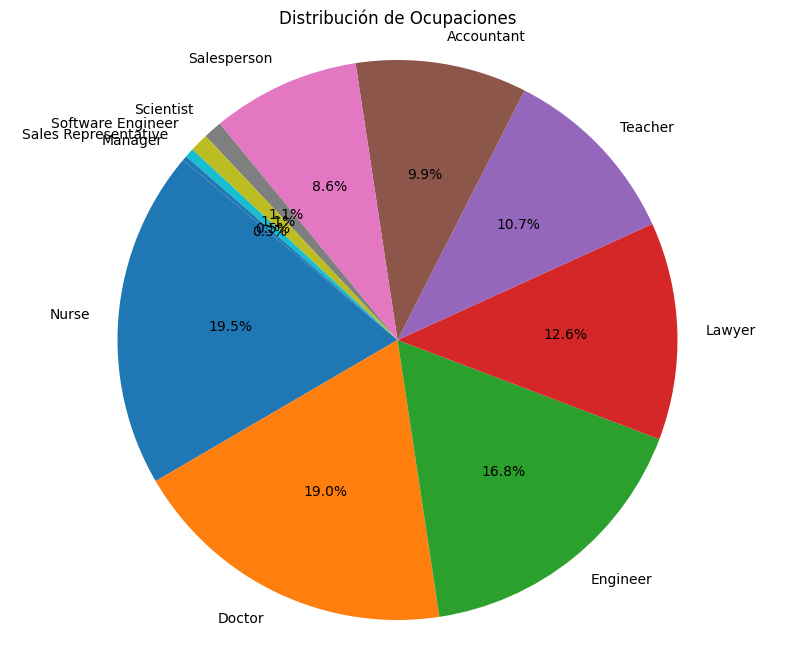

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribución de Ocupaciones")
plt.axis('equal')
plt.show()

In [ ]:
bmi_counts = df['BMI Category'].value_counts()
display(bmi_counts)

,count
BMI Category,
Normal,195
Overweight,148
Normal Weight,21
Obese,10


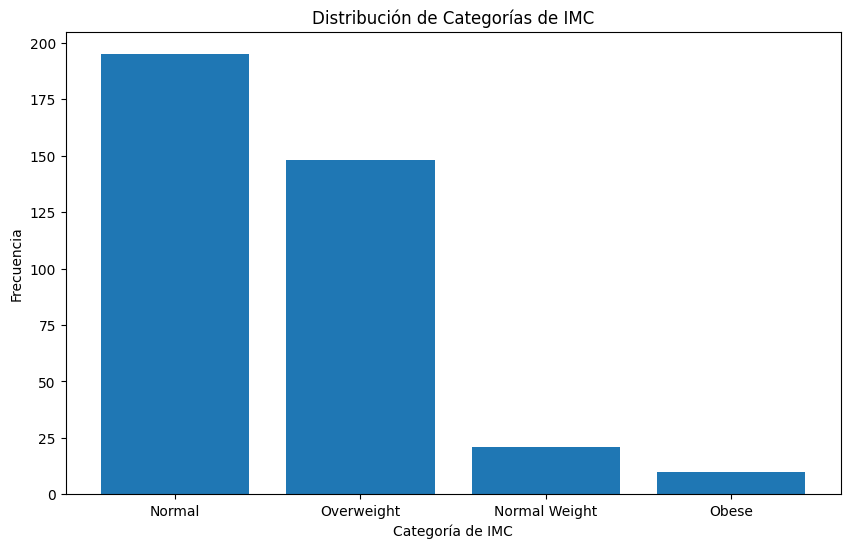

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(bmi_counts.index, bmi_counts.values)
plt.title("Distribución de Categorías de IMC")
plt.xlabel("Categoría de IMC")
plt.ylabel("Frecuencia")
plt.show()

In [ ]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

grouped_data = df.groupby(['BMI Category', 'Sleep Disorder']).size().reset_index(name='Frequency')
display(grouped_data.head())

,BMI Category,Sleep Disorder,Frequency
0,Normal,Insomnia,7
1,Normal,None,183
2,Normal,Sleep Apnea,5
3,Normal Weight,Insomnia,2
4,Normal Weight,None,17


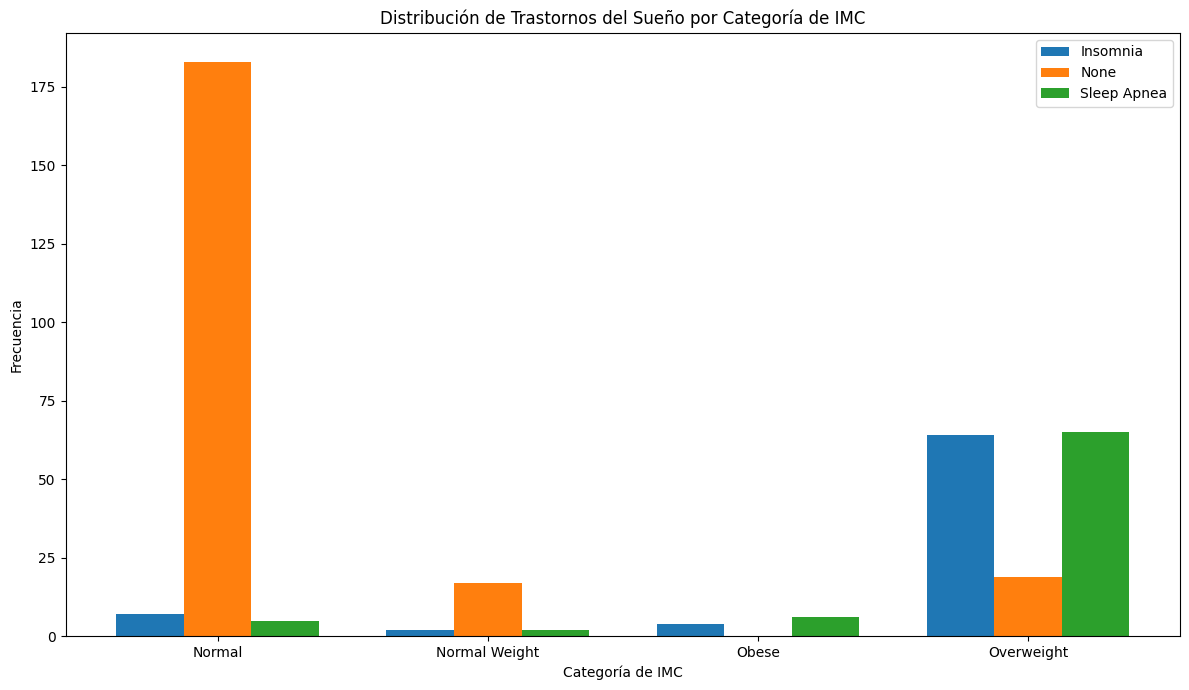

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))

bmi_categories = grouped_data['BMI Category'].unique()
sleep_disorders = grouped_data['Sleep Disorder'].unique()

bar_width = 0.25
r = np.arange(len(bmi_categories))

bars = []
for i, disorder in enumerate(sleep_disorders):
    disorder_frequencies = grouped_data[grouped_data['Sleep Disorder'] == disorder]['Frequency'].values

    full_frequencies = []
    for category in bmi_categories:
        freq = grouped_data[(grouped_data['BMI Category'] == category) & (grouped_data['Sleep Disorder'] == disorder)]['Frequency'].values
        if len(freq) > 0:
            full_frequencies.append(freq[0])
        else:
            full_frequencies.append(0)

    bars.append(plt.bar(r + i * bar_width, full_frequencies, width=bar_width, label=disorder))

plt.title("Distribución de Trastornos del Sueño por Categoría de IMC")
plt.xlabel("Categoría de IMC")
plt.ylabel("Frecuencia")
plt.xticks(r + bar_width * (len(sleep_disorders) - 1) / 2, bmi_categories) # Adjusted x-tick positions
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')
occupation_sleep_disorder_counts = df.groupby(['Occupation', 'Sleep Disorder']).size().reset_index(name='Frequency')
display(occupation_sleep_disorder_counts.head())

,Occupation,Sleep Disorder,Frequency
0,Accountant,Insomnia,7
1,Accountant,None,30
2,Doctor,Insomnia,3
3,Doctor,None,64
4,Doctor,Sleep Apnea,4


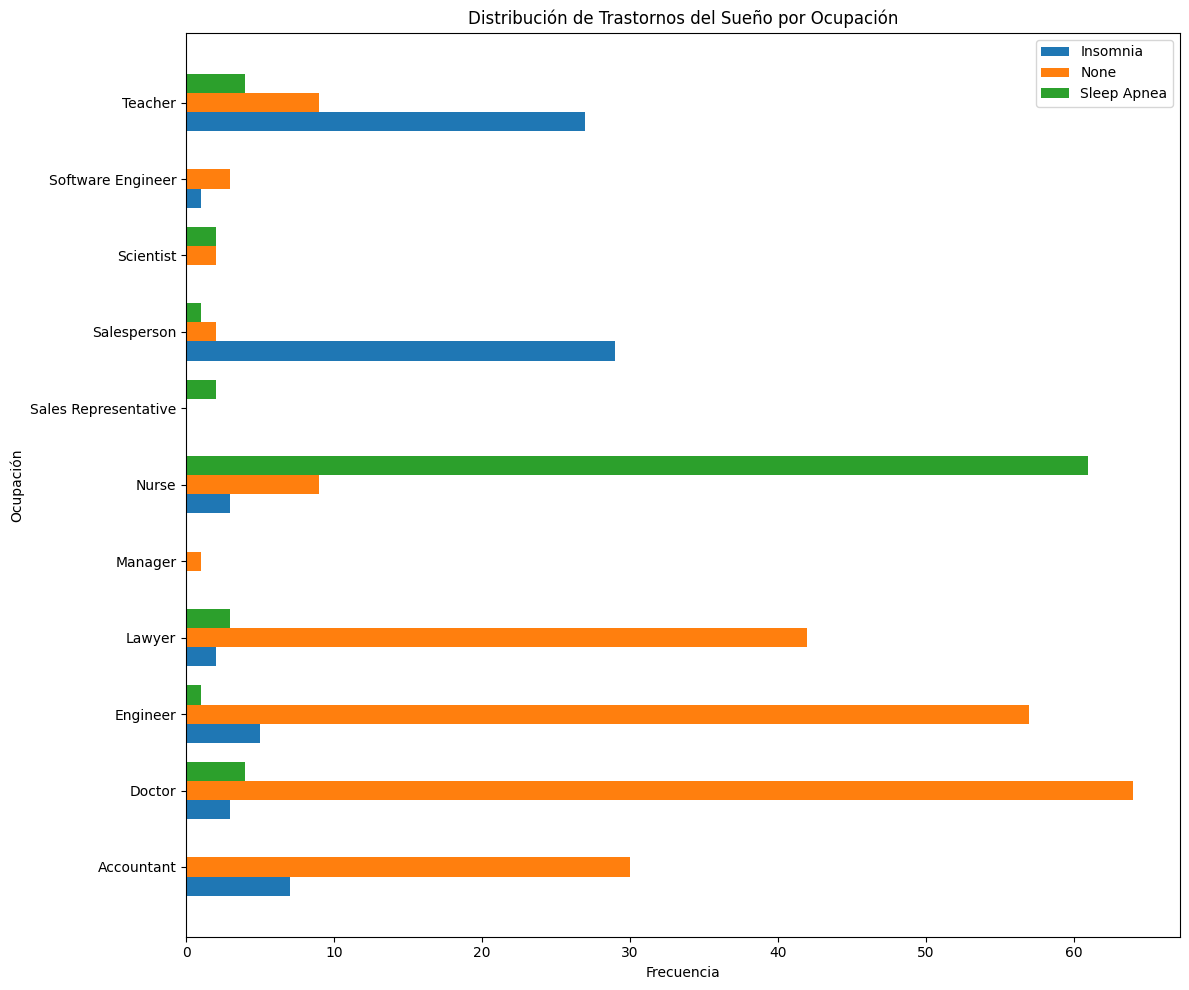

In [ ]:
plt.figure(figsize=(12, 10))

occupations = occupation_sleep_disorder_counts['Occupation'].unique()
sleep_disorders = occupation_sleep_disorder_counts['Sleep Disorder'].unique()

bar_height = 0.25
r = np.arange(len(occupations))

bars = []
for i, disorder in enumerate(sleep_disorders):
    disorder_frequencies = []
    for occupation in occupations:
        freq = occupation_sleep_disorder_counts[(occupation_sleep_disorder_counts['Occupation'] == occupation) & (occupation_sleep_disorder_counts['Sleep Disorder'] == disorder)]['Frequency'].values
        if len(freq) > 0:
            disorder_frequencies.append(freq[0])
        else:
            disorder_frequencies.append(0)

    bars.append(plt.barh(r + i * bar_height, disorder_frequencies, height=bar_height, label=disorder))

plt.title("Distribución de Trastornos del Sueño por Ocupación")
plt.ylabel("Ocupación")
plt.xlabel("Frecuencia")
plt.yticks(r + bar_height * (len(sleep_disorders) - 1) / 2, occupations)
plt.legend()
plt.tight_layout()
plt.show()

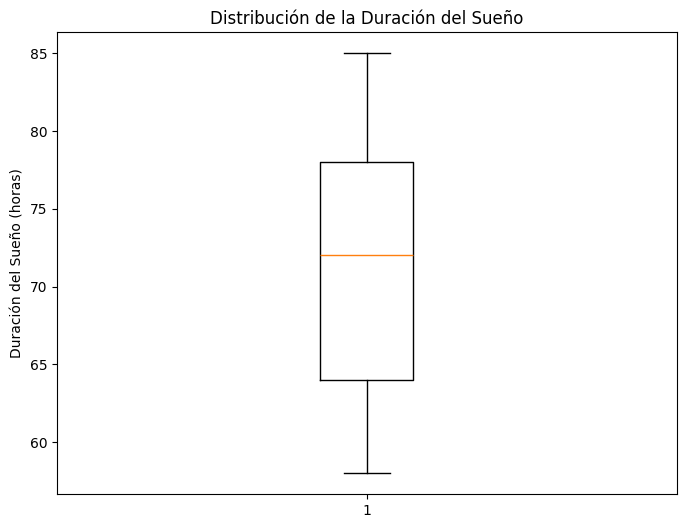

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Sleep Duration'])
plt.title("Distribución de la Duración del Sueño")
plt.ylabel("Duración del Sueño (horas)")
plt.show()